# Recorrido de Grafos
        


In [1]:
class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
    
    def adjacency_list(self):
        pass
    
class simple_graph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
        
    
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges if u==n } | {u for u,v in self.edges if v==n}
        return {v:adjacent(v) for v in self.nodes}

    
class simple_digraph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges if u!=None} | {v for u,v in self.edges if v!=None}
        
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges if u==n and v!=None} 
        return {v:adjacent(v) for v in self.nodes} 
    
    def in_degree(self):
        degree= lambda n : len({u for u,v in self.edges if v==n and u!=None})
        return {v:degree(v) for v in self.nodes}

In [2]:
import numpy as np
random_graph = lambda n,p : {(u,v) for u in np.arange(n) for v 
                    in np.arange(n) if np.random.rand()>p and u!=v}
# cantidad de vértices
n=1e2
# 1- probabilidad de crear aristas
p=0.9

E=random_graph(n,p)
G=simple_graph(E)

print len(G.nodes)
#print G.adjacency_list()

100


In [3]:
# https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/
import time

def dfs(graph, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited

def bfs(graph, start):
    visited, queue = set(), [start]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
    return visited


start=time.clock()
print(bfs(G.adjacency_list(),1))
end=time.clock()
print('Tiempo BFS: ',end)
start=time.clock()
print(dfs(G.adjacency_list(),1))
end=time.clock()
print('Tiempo DFS: ',end)


set([0.0, 1, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0])
('Tiempo BFS: ', 1.208025)
set([0.0, 1, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64

In [4]:
def topological_sort(graph):
    topology = []
    degree = graph.in_degree()
    adj=graph.adjacency_list()
    stack=[key for (key,value) in G.in_degree().items() if value==0]   
    while stack:
        vertex = stack.pop()
        topology.append(vertex)
        for m in adj[vertex]:
            degree[m] -= 1
            if not degree[m]:
                stack.append(m)
    if len(topology) < len(graph.nodes):
        raise ValueError('graph contains cycle')
    return topology




In [5]:
import time
import os
import random
from multiprocessing import Process, Queue, Lock


def producer(queue, lock, names):
    with lock:
        print('Starting producer => {}'.format(os.getpid()))
    for name in names:
        queue.put(name)
    with lock:
        print('Producer {} exiting...'.format(os.getpid()))

def consumer(queue, lock):
    with lock:
        print('Starting consumer => {}'.format(os.getpid()))
    while True:
        name = queue.get()
        with lock:
            print('Process {} got {}'.format(os.getpid(), name))

            
def parallel_topological_sort(graph):
    degree = graph.in_degree()
    adj=graph.adjacency_list()
    lock = Lock()
    producers = []
    consumers = []
    #names=[key for (key,value) in G.in_degree().items() if value==0]
    names = [['F', 'G'],
             ['A', 'B', 'C', 'D', 'E']]
    queues = [Queue() for n in names]
    for i,n in enumerate(names):
        producers.append(Process(target=producer, args=(queues[i], lock, n)))

    for q in queues:
        p = Process(target=consumer, args=(q, lock))
        p.daemon = True
        consumers.append(p)

    for p in producers:
        p.start()

    for c in consumers:
        c.start()

    for p in producers:
        p.join()



In [6]:
E=[('A', 'B'),('A', 'D'),('B', 'C'),('B', 'E'),('C', 'D'),('C', 'E'),('D', 'E'),('F', 'G')]
G=simple_digraph(E)
print G.adjacency_list()
print G.in_degree()
L=topological_sort(G)
print('Orden topologico',L)

LP=parallel_topological_sort(G)
#print('Orden topologico paralelo',LP)


{'A': set(['B', 'D']), 'C': set(['E', 'D']), 'B': set(['C', 'E']), 'E': set([]), 'D': set(['E']), 'G': set([]), 'F': set(['G'])}
{'A': 0, 'C': 1, 'B': 1, 'E': 3, 'D': 2, 'G': 1, 'F': 0}
('Orden topologico', ['F', 'G', 'A', 'B', 'C', 'D', 'E'])
Starting producer => 5712
Producer 5712 exiting...
Starting producer => 5713
Producer 5713 exiting...
Starting consumer => 5718
Starting consumer => 5725
Process 5718 got F
Process 5725 got A
Process 5718 got G
Process 5725 got B
Process 5725 got C
Process 5725 got D
Process 5725 got E


In [7]:
G.nodes

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

('Orden topologico Networkx', ['F', 'G', 'A', 'B', 'C', 'D', 'E'])


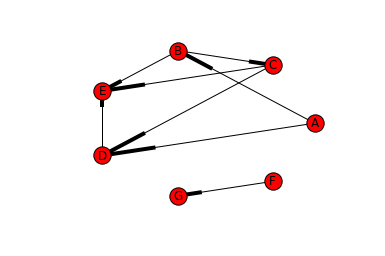

In [57]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph(E)

print('Orden topologico Networkx',list(nx.topological_sort(graph)))
#plt.figure(1,figsize=(12,12)) 
labels=nx.draw_networkx_labels(graph,pos=nx.circular_layout(graph))
nx.draw(graph,pos=nx.circular_layout(graph))
plt.show()

# Resolución de Dependencias de Software


En esta tarea Ud. debe utilizar el algoritmo de ordenamiento topologico para implementar un gestor de paquetes para Python. De manera de instalar un paquete dado, el gestor de paquete debe analizar las dependencias. Las dependencias forman un grafo dirigido ya que los paquetes sin dependencias pueden ser instalados primero hasta completar la lista completa de dependencias.

Un problema común de los gestores de paquetes son las dependencias circulares :



Por lo tanto, de manera de convertir la lista de dependencias en un grafo acíclico dirigido (DAG), se debe eliminar este tipo de dependencias así como también los otros ciclos que puedan aparecer.

En particular, se debe entregar un informe con las siguientes actividades:

    1.) Convertir archivo JSON de dependencias de software en un DAG (eliminando ciclos).
    2.) Implementar ordenamiento topológico sobre el DAG para obtener la secuencia de instalación de los paquetes que satisface las dependencias.
    3.) **Extra**  Implementar un instalador paralelo. 
    
[Fuente](https://ipython-books.github.io/143-resolving-dependencies-in-a-directed-acyclic-graph-with-a-topological-sort/)


In [ ]:
import json

with open('data/dependencias.json') as json_file:
    data=json.load(json_file)
    
print json.dumps(data,indent=4,sort_keys=True)

In [ ]:
import subprocess
import sys
import multiprocessing

def install(package):
    subprocess.call([sys.executable, "-m", "pip", "install", package])
    
class task_scheduler:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.di_graph=simple_digraph(_edges)
    
    def serial_processing(self):
        L=topological_sort(self.di_graph)
        return L

E=[('numpy', 'autograd'),('future', 'autograd')]
scheduler=task_scheduler(E)
for i,task in enumerate(scheduler.serial_processing()):
    print i,task